<a href="https://colab.research.google.com/github/EnricCruzadoCampos/CounterSeedsGO/blob/main/notebooks/APP_CONTADOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚙️ Iniciando diagnóstico...
📦 Archivo descargado. Tamaño: 18.29 MB

🔍 LISTA EXACTA DE CLASES EN TU MODELO:
{0: 'Bean', 1: 'Corn', 2: 'Impurity', 3: 'Rice', 4: 'Rice_Brown', 5: 'Rice_Milled', 6: 'Straw', 7: 'Wheat_Broke', 8: 'Wheat_Chaff', 9: 'Wheat_Grain', 10: 'Wheat_ThinGrain', 11: 'Xian'}

📸 SUBE TU FOTO


Saving ArrozZoom.jpeg to ArrozZoom (1).jpeg

0: 640x480 1 Wheat_Broke, 2 Wheat_Chaffs, 55 Wheat_Grains, 4 Wheat_ThinGrains, 380.6ms
Speed: 9.5ms preprocess, 380.6ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 480)
⚠️ LA IA NO HA VISTO NADA (0 Máscaras).

✅ Total objetos encontrados: 0


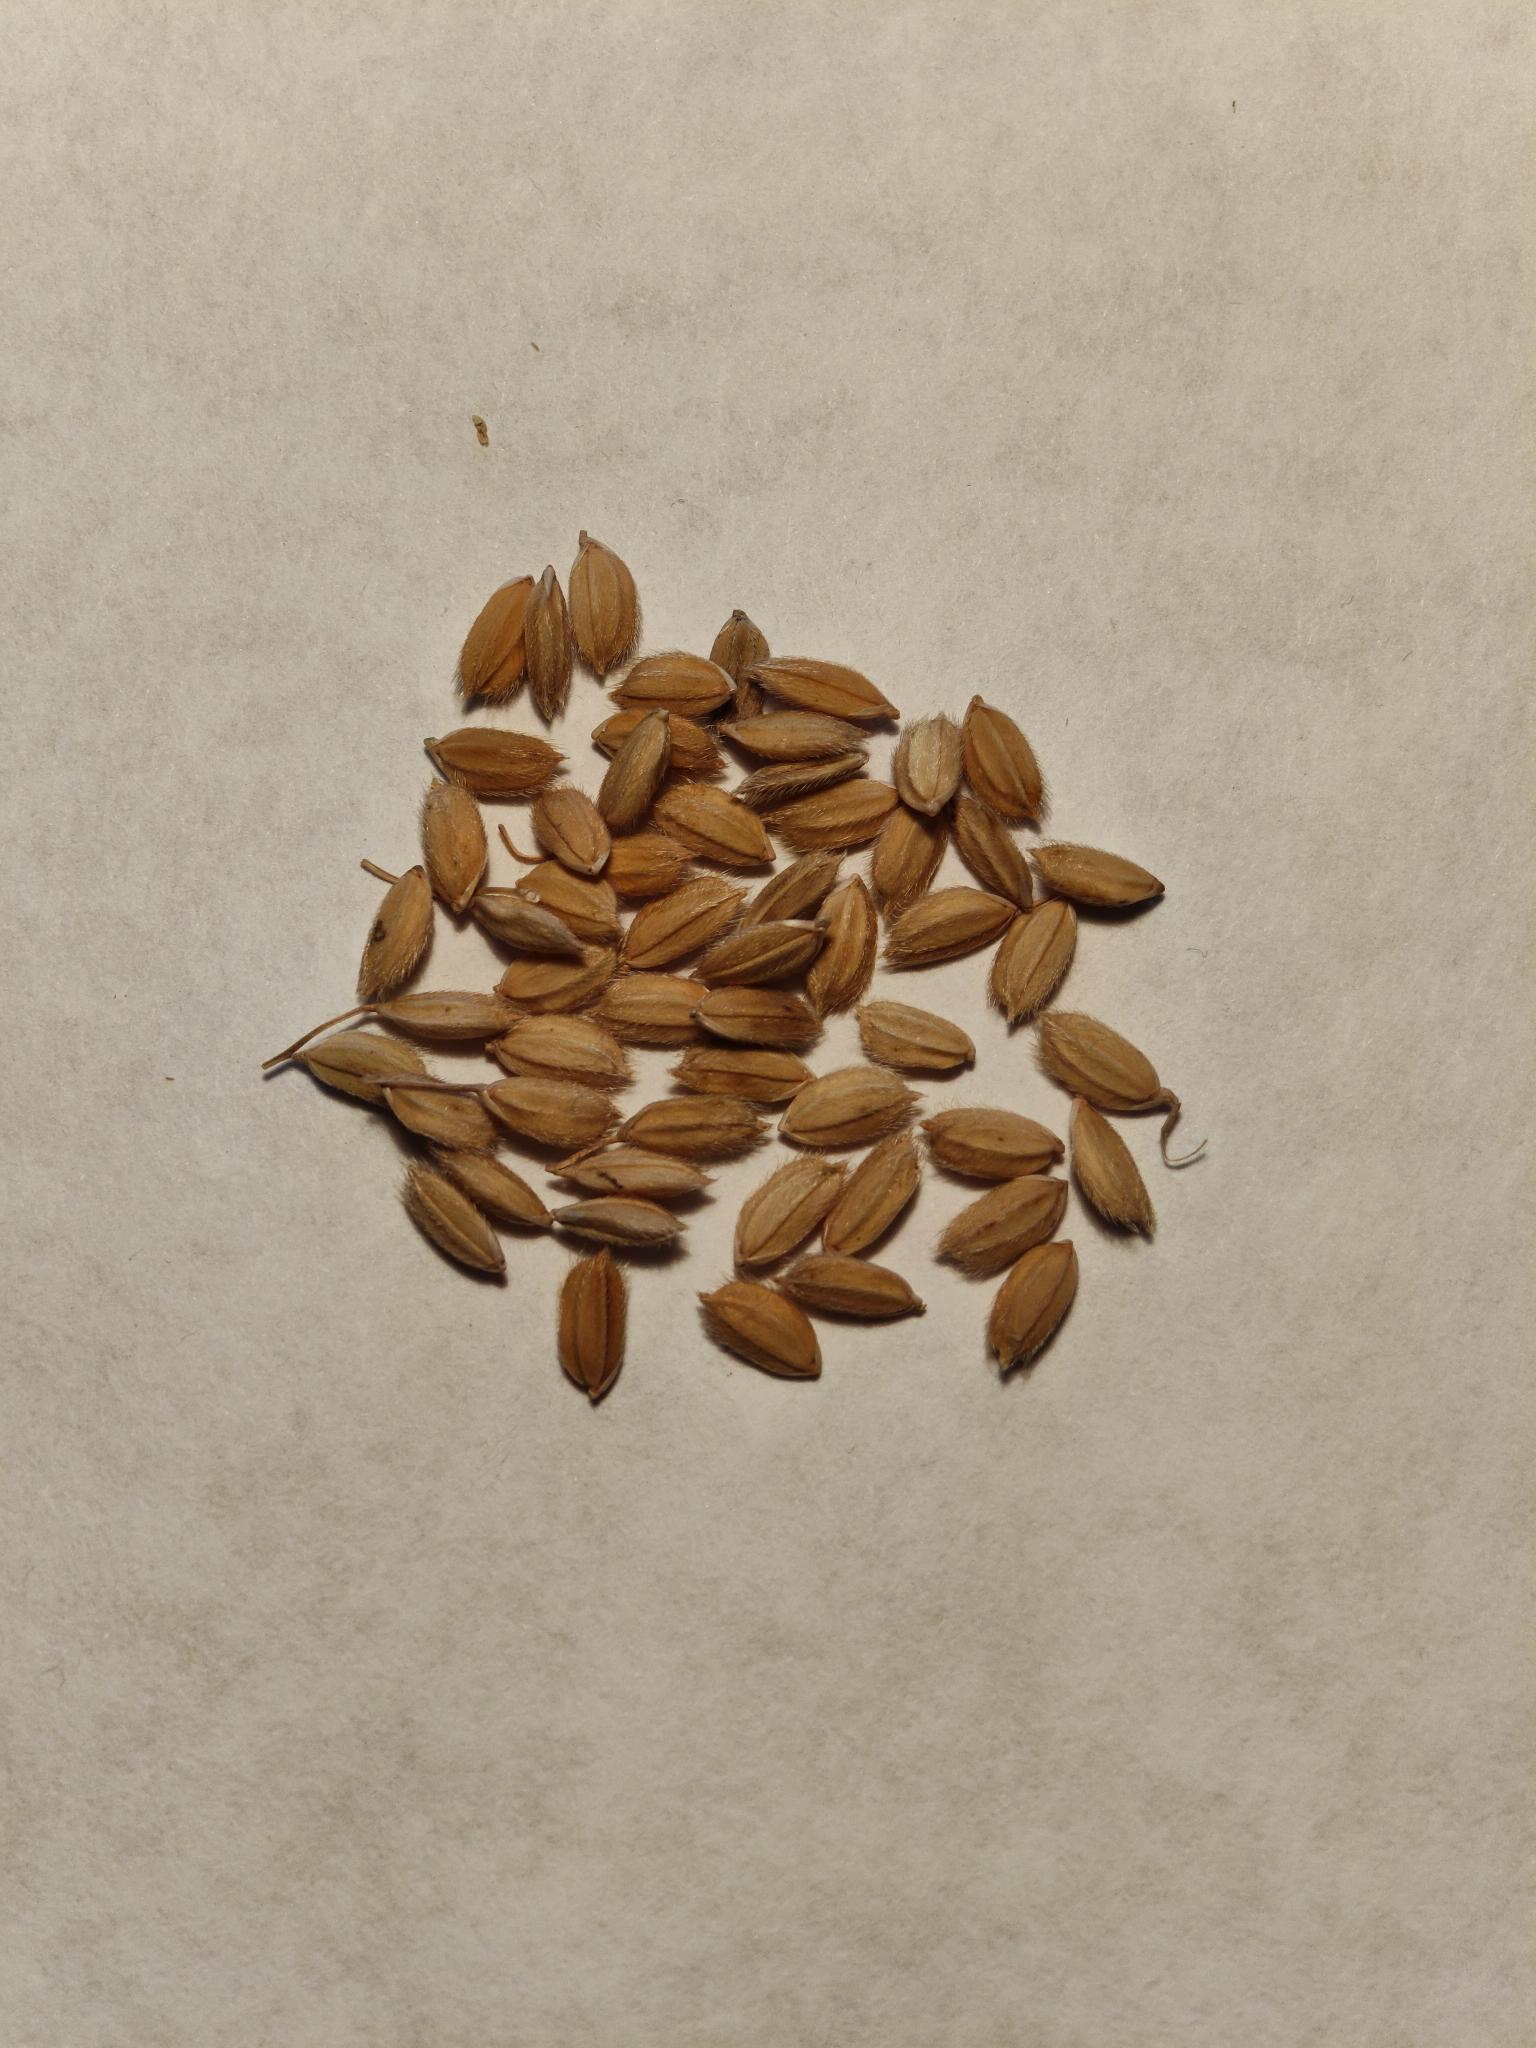

In [32]:
# @title 🌾 ANALIZADOR AI 🤖

# @markdown 1. Dale al Play.
# @markdown 2. Sube tu foto.
# @markdown 3. Verás la silueta exacta de cada grano y el análisis de pureza.
# @title 🩺 SCRIPT DE DIAGNÓSTICO (Pinta todo + Chivato de Nombres)
import os
import cv2
import numpy as np
import urllib.request
import random
from google.colab import files
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# --- CONFIGURACIÓN ---
USUARIO = "EnricCruzadoCampos"
REPO = "CounterSeedsGO"
RAMA = "main"
URL = f"https://github.com/{USUARIO}/{REPO}/raw/{RAMA}/models/best.pt"

def diagnostico():
    print("⚙️ Iniciando diagnóstico...")
    os.system('pip install ultralytics opencv-python-headless > /dev/null')

    # 1. Descarga forzada
    if os.path.exists('best.pt'): os.remove('best.pt')
    try:
        urllib.request.urlretrieve(URL, 'best.pt')
        size = os.path.getsize('best.pt') / (1024*1024)
        print(f"📦 Archivo descargado. Tamaño: {size:.2f} MB")
        if size < 5: print("⚠️ ¡ALERTA! El archivo es muy pequeño. ¿Seguro que es el modelo bueno?")
    except:
        print("❌ Error de descarga.")
        return

    # 2. Cargar y "Chivarse" de los nombres
    try:
        model = YOLO('best.pt')
        print("\n" + "="*40)
        print("🔍 LISTA EXACTA DE CLASES EN TU MODELO:")
        print(model.names) # <--- ESTO ES LO QUE NECESITO QUE VEAS
        print("="*40 + "\n")
    except Exception as e:
        print(f"❌ El modelo no carga. Error: {e}")
        return

    print("📸 SUBE TU FOTO")
    uploaded = files.upload()

    for nombre in uploaded.keys():
        file_bytes = np.frombuffer(uploaded[nombre], np.uint8)
        img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
        overlay = img.copy()

        # 3. Inferencia SIN FILTROS
        # Bajamos confianza a 0.1 para que detecte hasta el aire
        results = model.predict(img, conf=0.1, retina_masks=True)

        objetos = 0

        for r in results:
            if r.masks is None:
                print("⚠️ LA IA NO HA VISTO NADA (0 Máscaras).")
                continue

            for mask, box in zip(r.masks.xy, r.boxes):
                objetos += 1
                cls_id = int(box.cls[0])
                cls_name = model.names[cls_id]
                conf = float(box.conf[0])

                # PINTAMOS TODO (Colores aleatorios para distinguir)
                # Usamos el ID para generar un color fijo por clase
                np.random.seed(cls_id)
                color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))

                points = np.int32([mask])
                cv2.fillPoly(overlay, points, color)
                cv2.polylines(img, points, True, (255,255,255), 1)

                # Escribir qué cree que es
                x, y = int(box.xyxy[0][0]), int(box.xyxy[0][1])
                etiqueta = f"{cls_id}: {cls_name}"
                cv2.putText(img, etiqueta, (x, y-10), 0, 0.5, (255,255,255), 2)

                print(f" -> Detectado: {cls_name} ({conf:.2f}%)")

        img_final = cv2.addWeighted(overlay, 0.5, img, 0.5, 0)
        print(f"\n✅ Total objetos encontrados: {objetos}")
        cv2_imshow(img_final)

if __name__ == "__main__":
    diagnostico()